### Assignment2 - Regression Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import metrics

#### Part1: A Sample Simple Dataset

In [2]:
diabetes = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

#### Part2: Data Visualization

In [3]:
diabetes.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Text(0.5, 0.98, 'Quantitative Measure of Disease Progression One Year After Baseline')

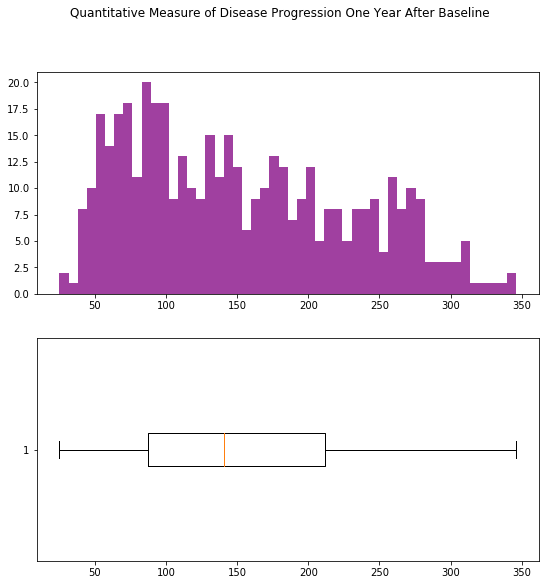

In [4]:
fig, ax = plt.subplots(2,1, figsize = (9,9))
ax[0].hist(diabetes["Y"], 50, facecolor='purple', alpha=0.75)
ax[1].boxplot(diabetes["Y"],showfliers=True, vert=False)
fig.suptitle('Quantitative Measure of Disease Progression One Year After Baseline')

Text(0.5, 0.98, 'Age')

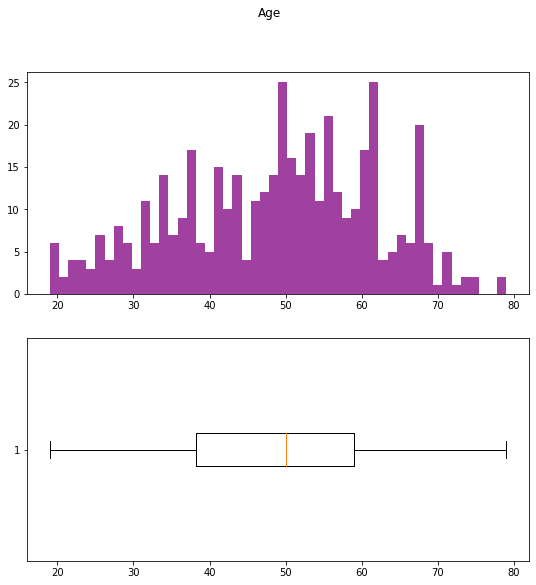

In [5]:
fig, ax = plt.subplots(2,1, figsize = (9,9))
ax[0].hist(diabetes["AGE"], 50, facecolor='purple', alpha=0.75)
ax[1].boxplot(diabetes["AGE"],showfliers=True, vert=False)
fig.suptitle('Age')

Text(0.5, 0.98, 'Body Mass Index')

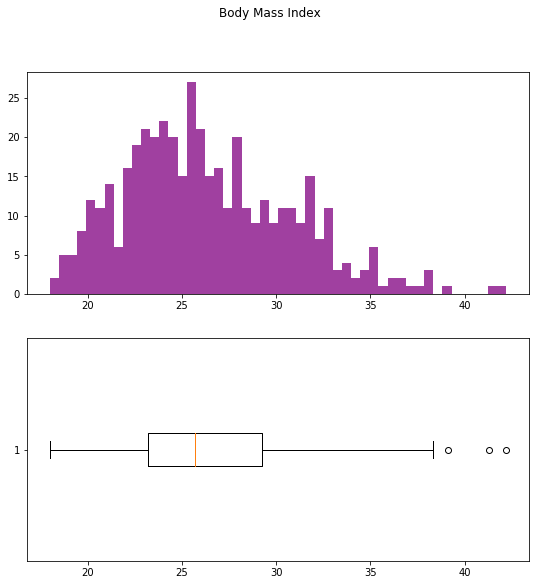

In [6]:
fig, ax = plt.subplots(2,1, figsize = (9,9))
ax[0].hist(diabetes["BMI"], 50, facecolor='purple', alpha=0.75)
ax[1].boxplot(diabetes["BMI"],showfliers=True, vert=False)
fig.suptitle('Body Mass Index')

Text(0.5, 0.98, 'Blood Pressure')

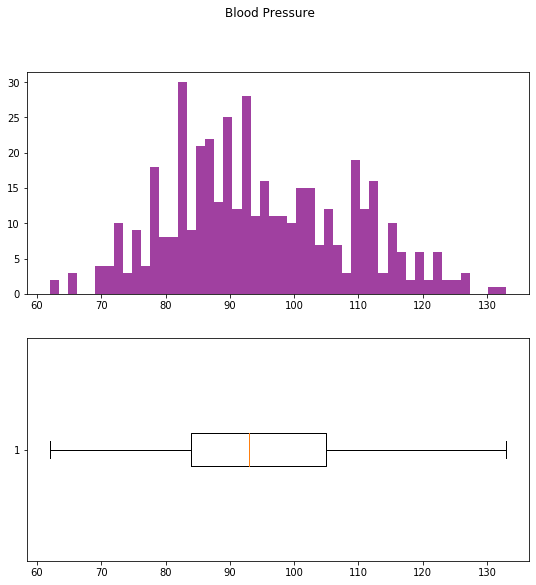

In [7]:
fig, ax = plt.subplots(2,1, figsize = (9,9))
ax[0].hist(diabetes["BP"], 50, facecolor='purple', alpha=0.75)
ax[1].boxplot(diabetes["BP"],showfliers=True, vert=False)
fig.suptitle('Blood Pressure')

Text(0.5, 1.0, 'Age x BMI')

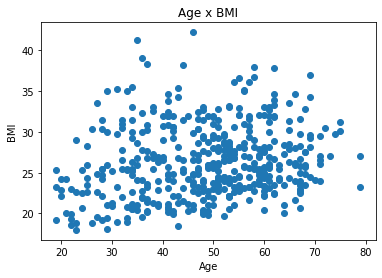

In [8]:
plt.scatter(diabetes["AGE"], diabetes["BMI"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age x BMI")

Text(0.5, 1.0, 'Y x BMI')

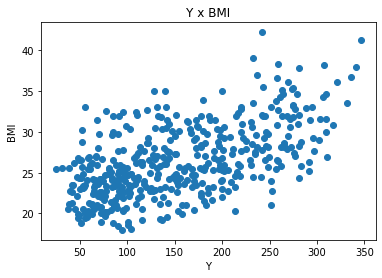

In [9]:
plt.scatter(diabetes["Y"], diabetes["BMI"])
plt.xlabel("Y")
plt.ylabel("BMI")
plt.title("Y x BMI")

#### Part3: Regression using Scikit-Learn

In [10]:
regr1 = linear_model.LinearRegression()

X = diabetes["BMI"].values.reshape(-1,1)
y = diabetes["Y"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr1.fit(X_train, y_train)

y_pred = regr1.predict(X_test)

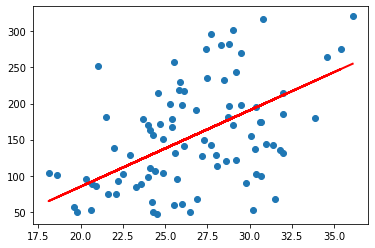

In [11]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)

In [12]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4150.6801893299835


#### Part4: Real-World Application

In [13]:
calEnv = pd.read_csv("https://data.ca.gov/dataset/ab4e1b38-df76-4397-b3cf-002fd16937c3/resource/6d6a9a5c-9221-4fc5-9b00-35015ae65837/download/calenviroscreen-final-report.csv")

In [14]:
col = [c for c in calEnv.columns if c[-4:] == "Pctl"]
calEnv = calEnv.drop(["Hyperlink","Click for interactive map", "Location 1", "Census Tract",'CES 2.0 Percentile Range'], axis=1)
calEnv = calEnv.drop(col, axis=1)

calEnv = calEnv.fillna(0)

In [15]:
calEnv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 26 columns):
Total Population          8035 non-null int64
California County         8035 non-null object
CES 2.0 Score             8035 non-null float64
Ozone                     8035 non-null float64
PM2.5                     8035 non-null float64
Diesel PM                 8035 non-null float64
Drinking Water            8035 non-null float64
Pesticides                8035 non-null float64
Tox. Release              8035 non-null float64
Traffic                   8035 non-null float64
Cleanup Sites             8035 non-null float64
Groundwater Threats       8035 non-null float64
Haz. Waste                8035 non-null float64
Imp. Water Bodies         8035 non-null int64
Solid Waste               8035 non-null float64
Pollution Burden          8035 non-null float64
Pollution Burden Score    8035 non-null float64
Age                       8035 non-null float64
Asthma                    8035 non

In [16]:
calEnv.columns

Index(['Total Population', 'California County', 'CES 2.0 Score', 'Ozone',
       'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release',
       'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste', 'Pollution Burden',
       'Pollution Burden Score', 'Age', 'Asthma', 'Low Birth Weight',
       'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment',
       'Pop. Char. ', 'Pop. Char. Score'],
      dtype='object')

Text(0.5, 0.98, 'Age-adjusted rate of emergency department visits for asthma')

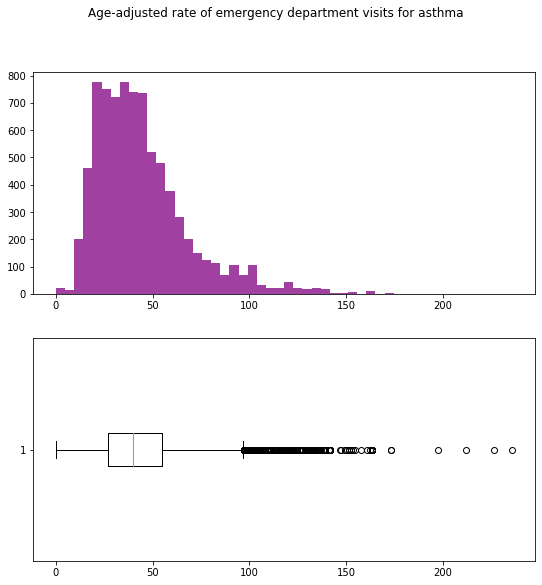

In [17]:
fig, ax = plt.subplots(2,1, figsize = (9,9))
ax[0].hist(calEnv["Asthma"], 50, facecolor='purple', alpha=0.75)
ax[1].boxplot(calEnv["Asthma"],showfliers=True, vert=False)
fig.suptitle('Age-adjusted rate of emergency department visits for asthma')

Text(0.5, 1.0, 'Age')

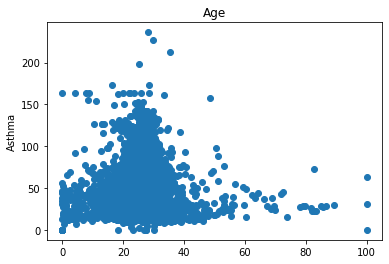

In [18]:
plt.scatter(calEnv["Age"], calEnv["Asthma"])
plt.ylabel("Asthma")
plt.title("Age")

Text(0.5, 1.0, 'Diesel')

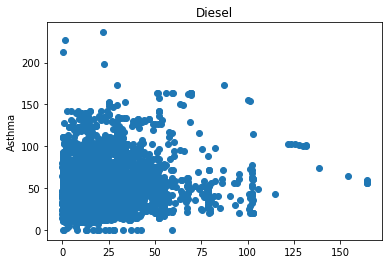

In [19]:
plt.scatter(calEnv["Diesel PM"], calEnv["Asthma"])
plt.ylabel("Asthma")
plt.title("Diesel")

Text(0.5, 1.0, 'Pollution')

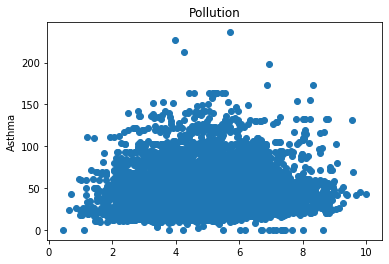

In [20]:
plt.scatter(calEnv["Pollution Burden Score"], calEnv["Asthma"])
plt.ylabel("Asthma")
plt.title("Pollution")

In [21]:
regr2 = linear_model.LinearRegression()

X2 = calEnv["Pollution Burden Score"].values.reshape(-1,1)
y2 = calEnv["Asthma"].values.reshape(-1,1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)
regr2.fit(X_train2, y_train2)

y_pred = regr2.predict(X_test2)

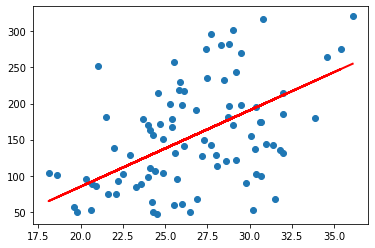

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)

0
trigger cont
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/home/leonardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/leonardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/leonardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, 

25


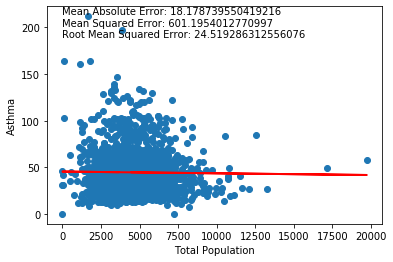

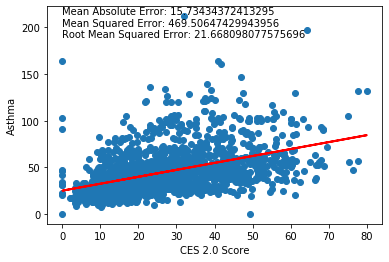

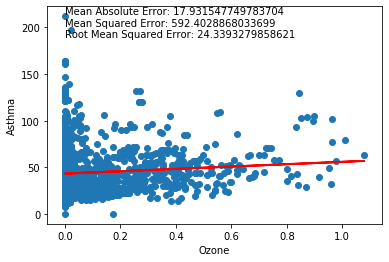

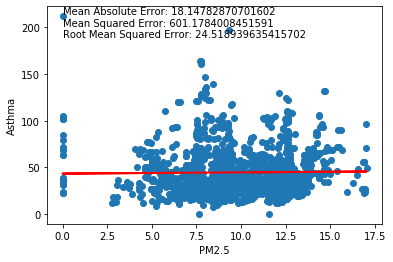

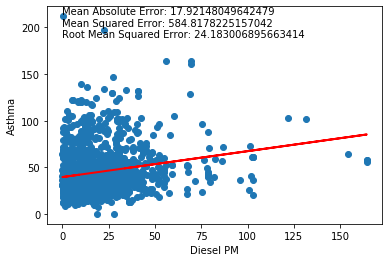

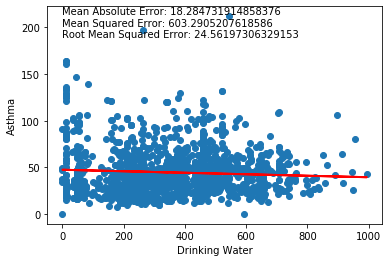

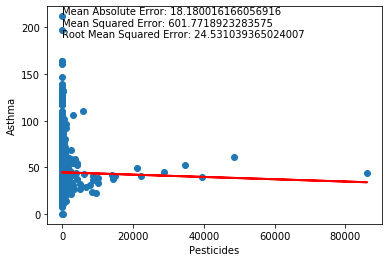

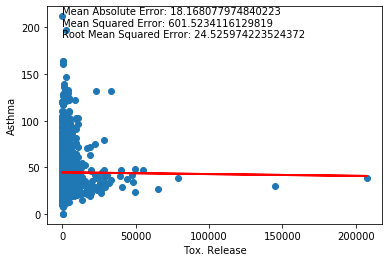

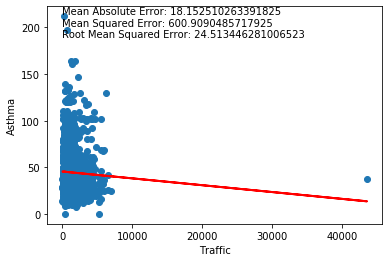

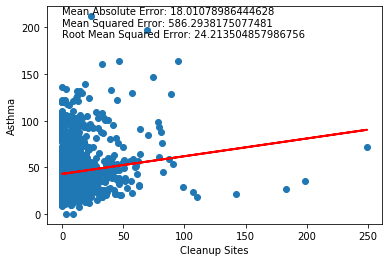

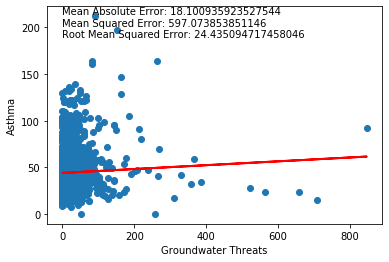

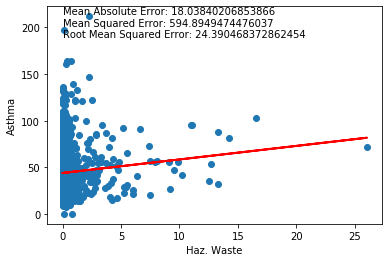

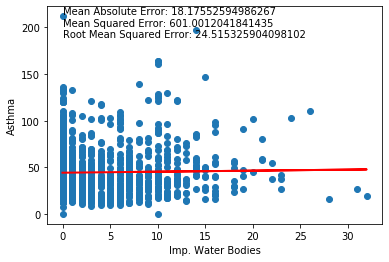

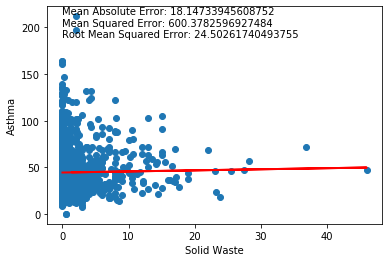

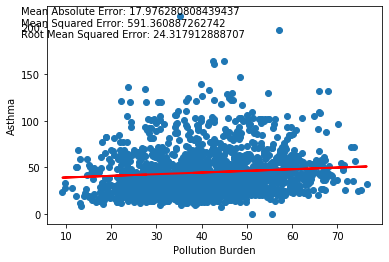

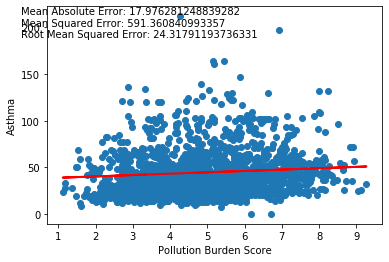

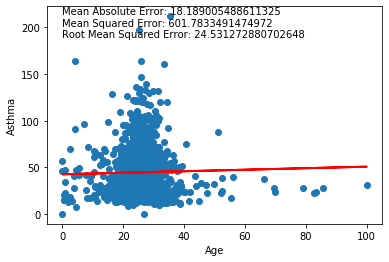

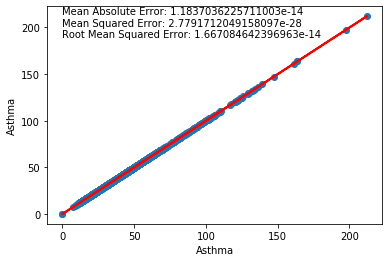

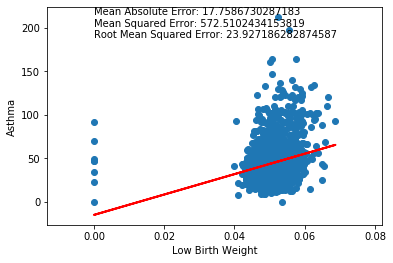

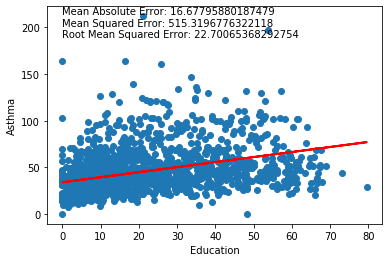

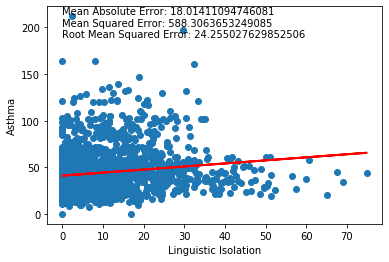

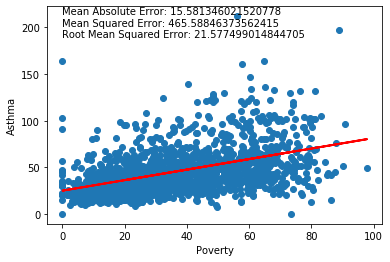

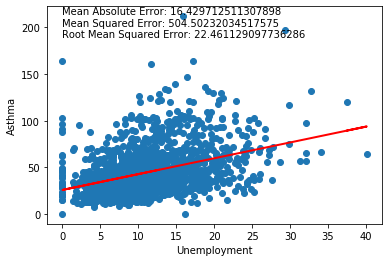

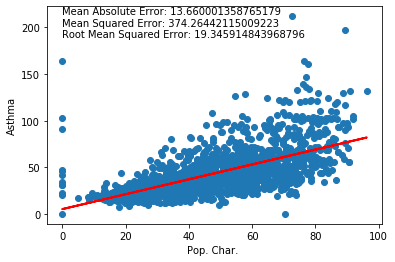

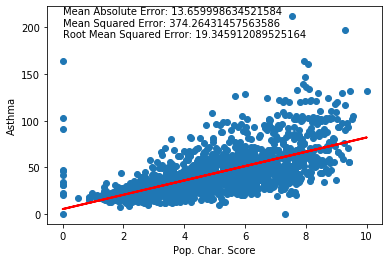

In [23]:

for c in range(len(calEnv.columns)):
    regr = linear_model.LinearRegression()

    X = calEnv.iloc[:,c].values.reshape(-1,1)
    if(X.dtype != np.float64 and X.dtype != np.int64):
        print("trigger cont")
        continue
    y = calEnv["Asthma"].values.reshape(-1,1)
    print(c)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_test)
    
    mae = 'Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, y_pred))
    mse = 'Mean Squared Error: ' + str(metrics.mean_squared_error(y_test, y_pred))
    rmse = 'Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    text = mae + '\n' + mse + '\n' + rmse
    
    plt.figure()
    plt.scatter(X_test, y_test)
    plt.ylabel("Asthma")
    plt.xlabel(calEnv.iloc[:,c].name)
    plt.text(0, 205, text, ha='left', va='center')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()